In [94]:
import pandas as pd 

#Read the csv file
data = pd.read_csv("housing.csv")

In [95]:
#visualize data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [96]:
from sklearn.cluster import KMeans

#Create a variable with the data we are going to use
x = data.loc[ : , ["latitude","longitude","population","households"]]

x

,latitude,longitude,population,households
0,37.88,-122.23,322.0,126.0
1,37.86,-122.22,2401.0,1138.0
2,37.85,-122.24,496.0,177.0
3,37.85,-122.25,558.0,219.0
4,37.85,-122.25,565.0,259.0
...,...,...,...,...
20635,39.48,-121.09,845.0,330.0
20636,39.49,-121.21,356.0,114.0
20637,39.43,-121.22,1007.0,433.0
20638,39.43,-121.32,741.0,349.0


In [97]:
#Create new row
x["pop_per_household"] = x['population']/x['households']

x.head()

,latitude,longitude,population,households,pop_per_household
0,37.88,-122.23,322.0,126.0,2.555556
1,37.86,-122.22,2401.0,1138.0,2.109842
2,37.85,-122.24,496.0,177.0,2.802260
3,37.85,-122.25,558.0,219.0,2.547945
4,37.85,-122.25,565.0,259.0,2.181467


In [98]:
#Create model
model = KMeans(n_clusters=4)
predictions = model.fit_predict(x)

c:\Users\eobga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [99]:
#Create segment
x["segment_per_household"] = predictions

<Axes: xlabel='latitude', ylabel='longitude'>

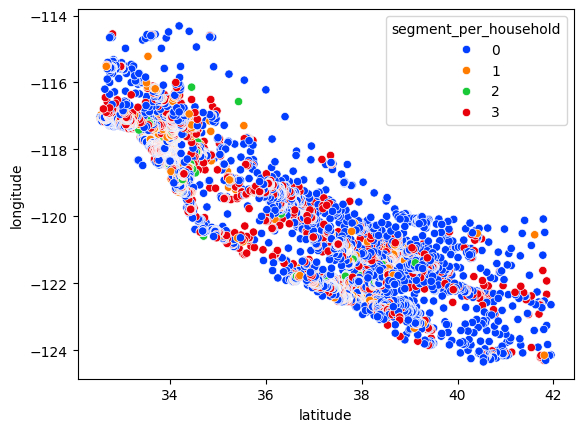

In [100]:
import seaborn as sb 

sb.scatterplot(x='latitude',y='longitude',data=x,hue='segment_per_household',palette="bright")

In [101]:
x.groupby(["segment_per_household"])['pop_per_household'].mean()

segment_per_household
0     2.829914
1     3.553580
2    12.473897
3     3.046512
Name: pop_per_household, dtype: float64

<Axes: xlabel='segment_per_household', ylabel='count'>

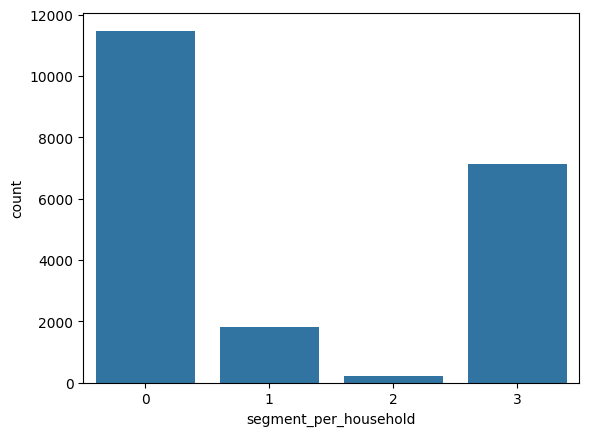

In [102]:
sb.countplot(x='segment_per_household',data=x)